#About notebook 
This notebook is used to predict house prices using ANN. 
* TF2.0 is used to build ANN model 
* Dataset is fetched from github Repo. of 'Cheng Li'.
* github: https://github.com/ChengLi9Data 
* Code inspiration : Dr. Ryan Ahmed, SuperDataScience  


## Data columns (21 columns in dataset)
** ida**: notation for a house
**date**: Date house was sold
**price**: Price is prediction target
**bedrooms**: Number of Bedrooms/House
**bathrooms**: Number of bathrooms/House
**sqft_living**: square footage of the home
**sqft_lot**: square footage of the lot
**floors**: Total floors (levels) in house
**waterfront**: House which has a view to a waterfront
**view**: Has been viewed
**condition**: How good the condition is ( Overall )
**grade**: overall grade given to the housing unit, based on King County grading system
**sqft_abovesquare**: footage of house apart from basement
**sqft_basement**: square footage of the basement
yr_built: Built Year
**yr_renovated**: Year when house was renovated
zipcode: zip
lat: Latitude coordinate
long: Longitude coordinate
**sqft_living15**: Living room area in 2015(implies-- some renovations)
**sqft_lot15**: lotSize area in 2015(implies-- some renovations)



#Import libraries 

In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from math import sqrt

from tensorflow.keras.layers import LeakyReLU 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load dataset 

In [2]:
# This dataset is fetched from github Repo of 'Cheng Li' github: https://github.com/ChengLi9

data=  pd.read_csv('https://raw.githubusercontent.com/ChengLi9/kc_house_data/master/kc_house_data.csv')

# EDA

In [3]:
# info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

21 features from data set , need to do feature selection

In [4]:
# data statistics
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
#check if null count
data.isnull().sum()
# no null values 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
# change date format 
data.date =  pd.to_datetime(data.date)      
#data.date = data.date.apply(lambda x: pd.to_datetime(x))

# Visualize data

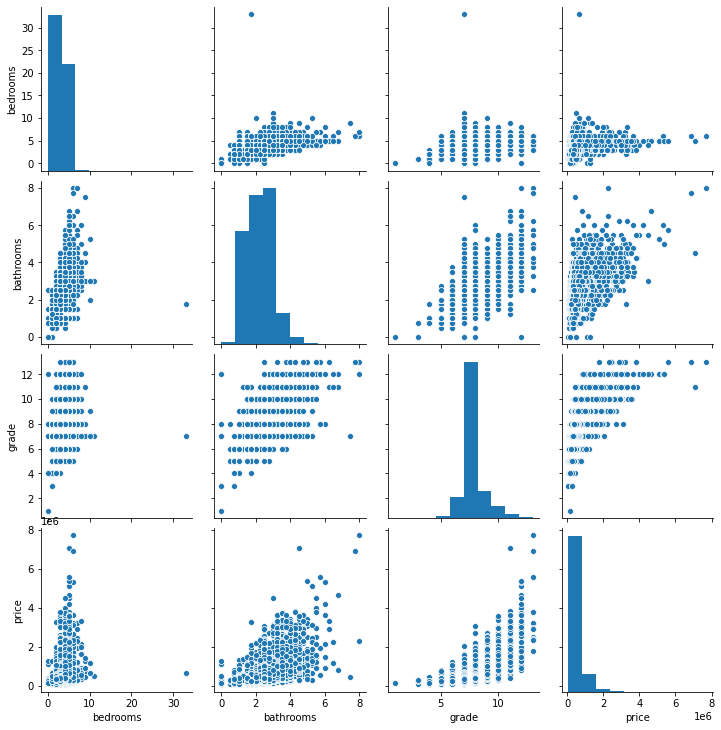

In [8]:
 num_feature1 = data[['bedrooms', 'bathrooms',  'grade', 'price']]
 sns.pairplot(num_feature1)



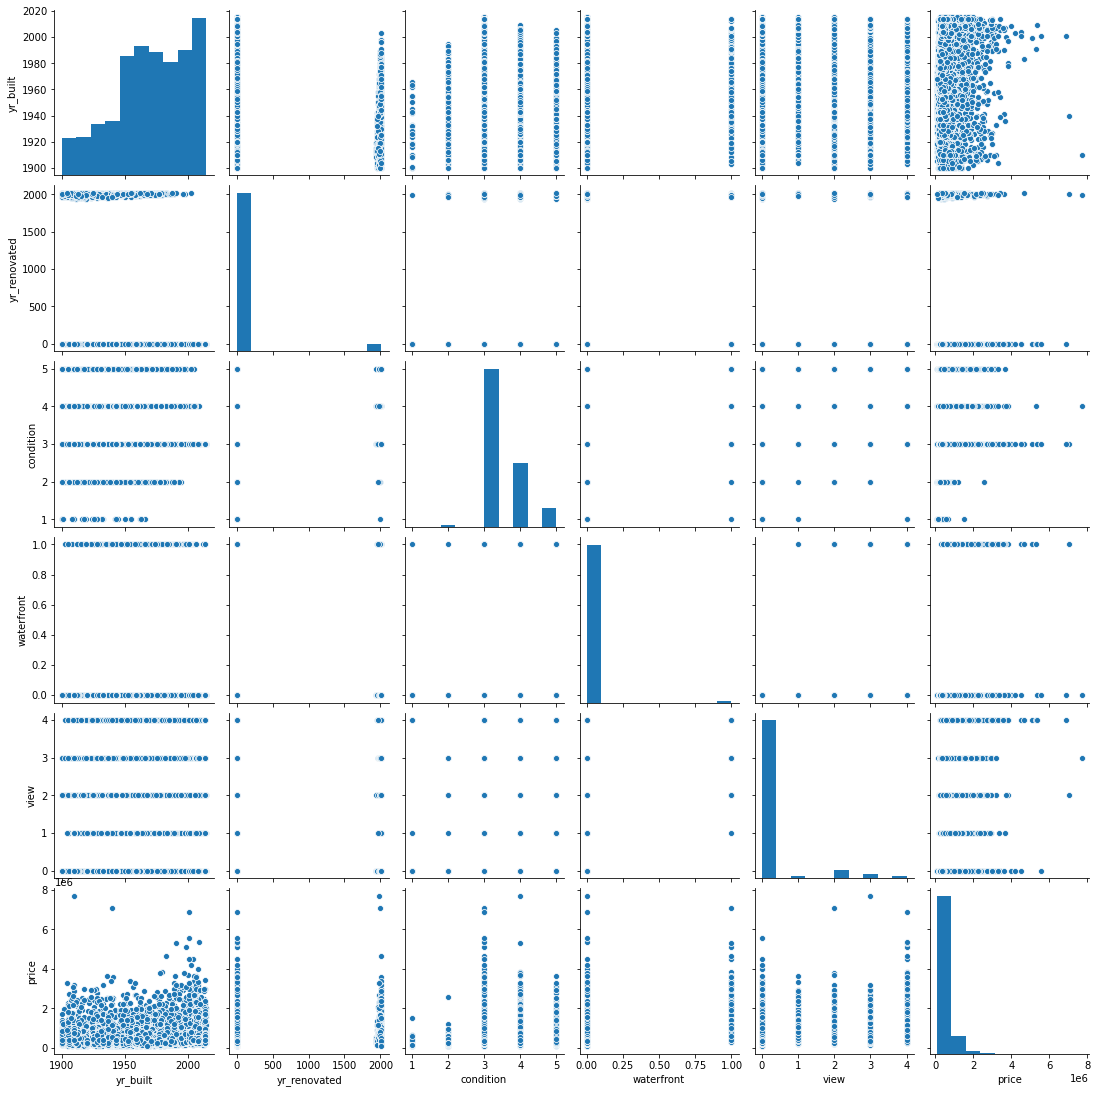

In [9]:
num_feature2 = data[[ 'yr_built', 'yr_renovated',  'condition','waterfront','view','price']]
sns.pairplot(num_feature2)

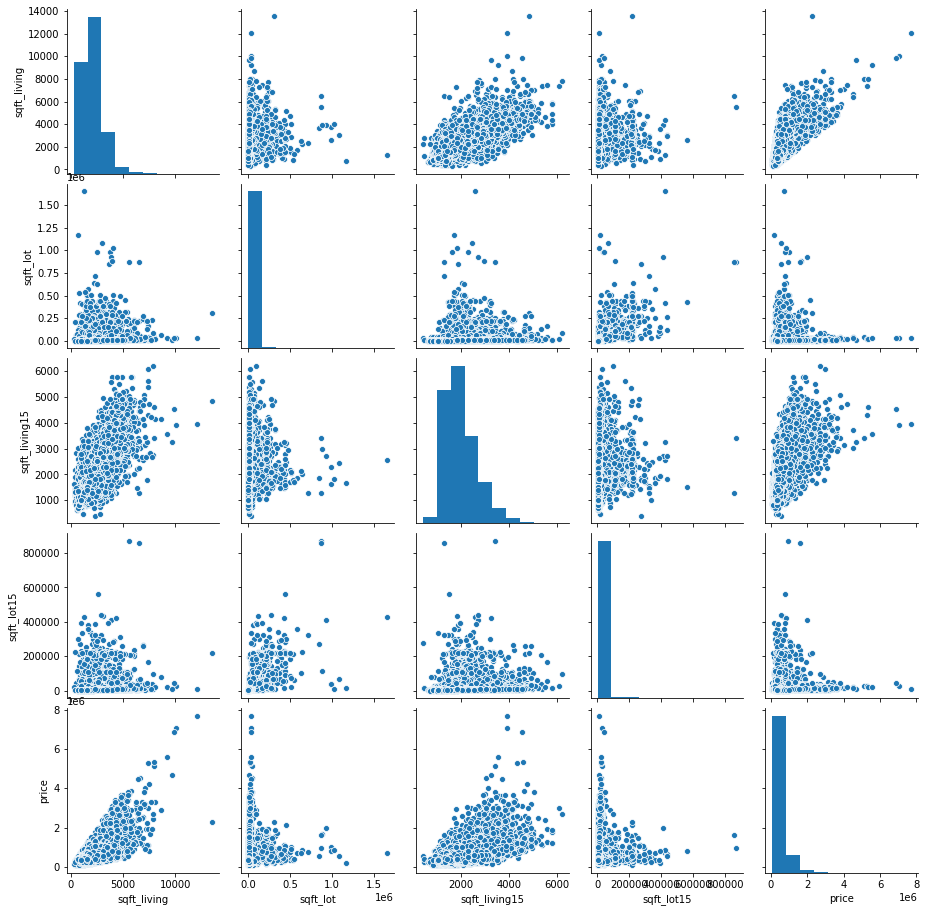

In [10]:
 num_feature3 = data [[ 'sqft_living', 'sqft_lot','sqft_living15', 'sqft_lot15','price']]
 sns.pairplot(num_feature3)

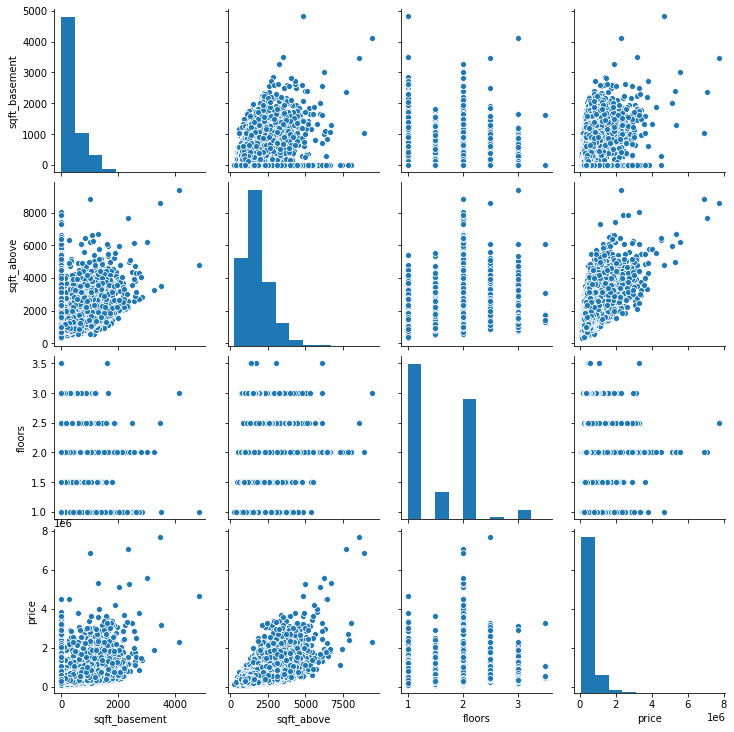

In [11]:
num_feature4 = data[['sqft_basement', 'sqft_above','floors','price']]
sns.pairplot(num_feature4)

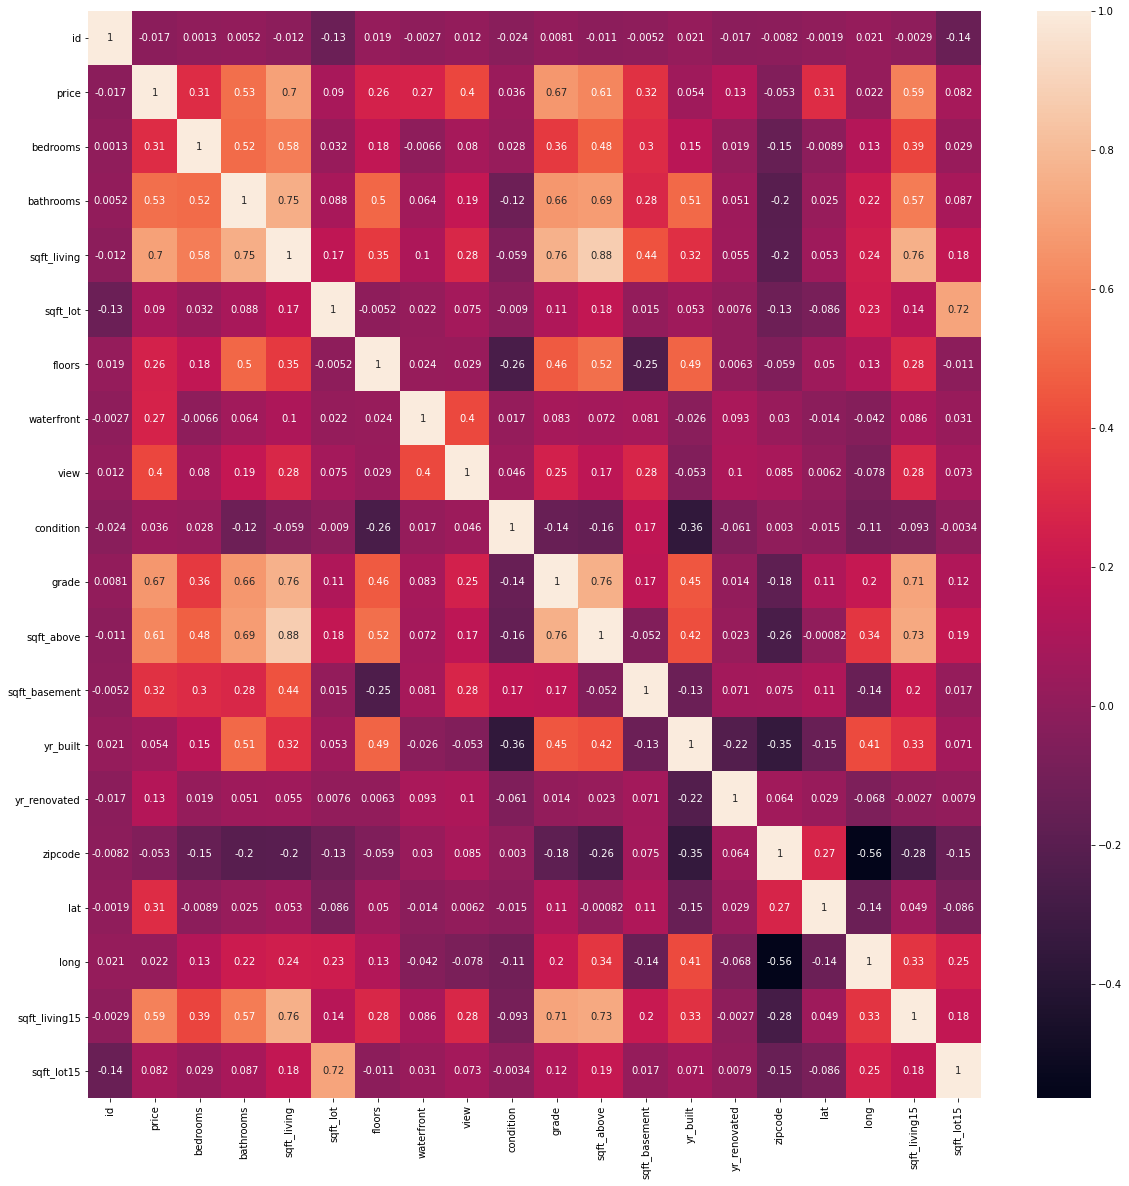

In [12]:
f= plt.subplots(figsize=(20,20) )
sns.heatmap(data.corr(), annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1dbc4a7f28>,
      dtype=object)

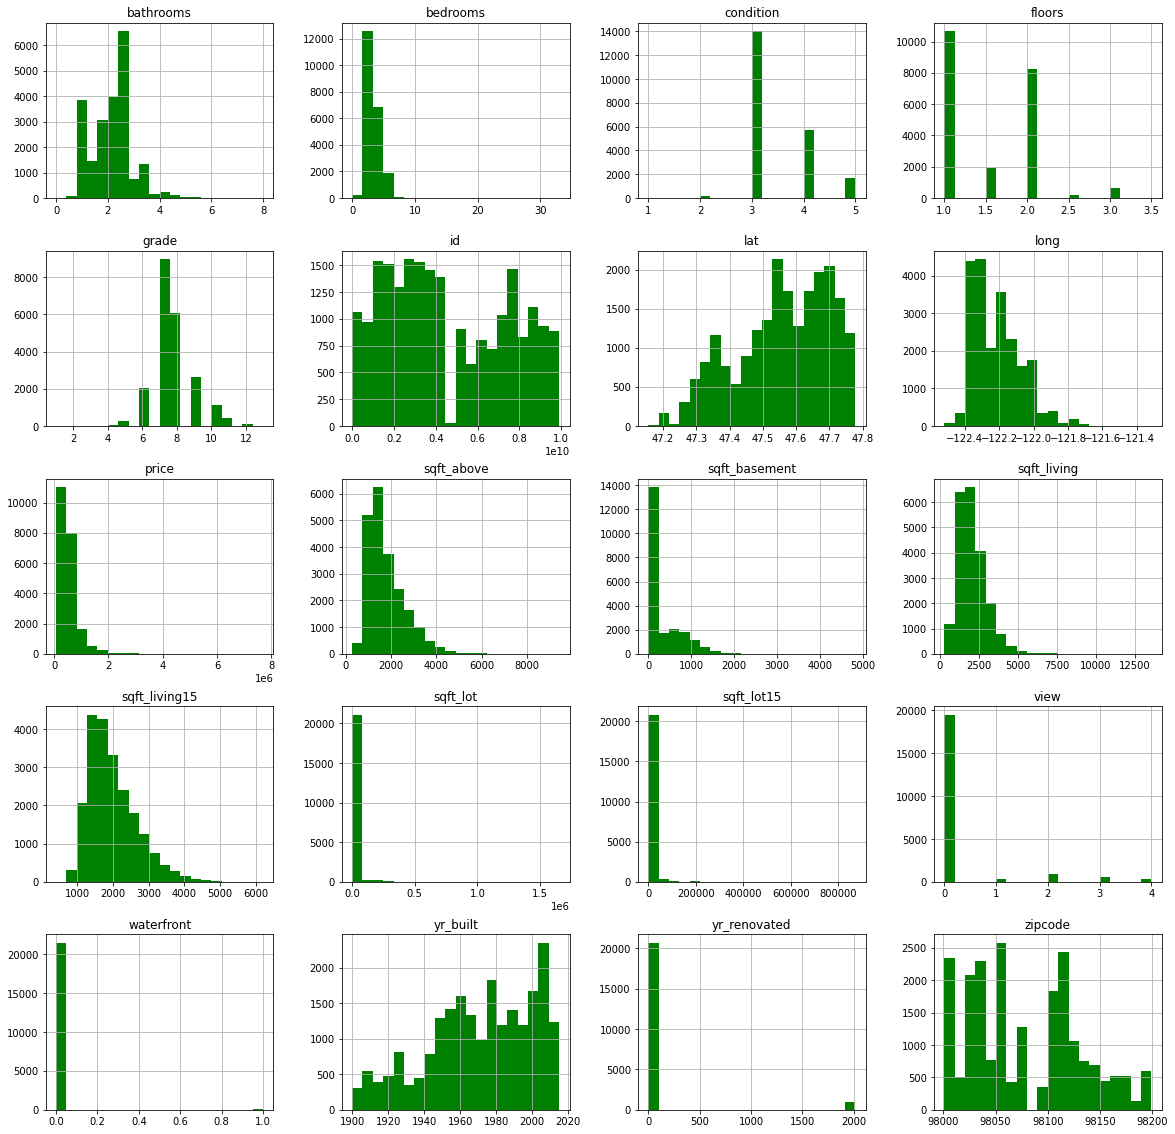

In [13]:
# what does histogram tells us : 
#https://statisticsbyjim.com/basics/histograms/#:~:text=Histograms%2C%20Central%20Tendency%2C%20and%20Variability,of%20values%20known%20as%20bins.
data.hist(bins = 20, figsize = (20,20), color = 'g')

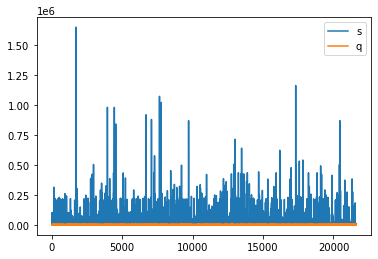

In [14]:
#f = plt.subplots(figsize= (20,20))

plt.plot(data['sqft_lot'])
plt.plot(data['sqft_living'])
plt.legend('sqft_lot')
plt.legend('sqft_living')

# Create Train and Test dataset 

In [15]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [16]:
selected_feature = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above','sqft_basement']

In [17]:
# input
X = data[selected_feature]
X.shape

(21613, 7)

In [18]:
# output
y= data['price']
y.shape

(21613,)

In [19]:
#rescale to bring all the columnn value to  a common scale 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# reshape your output, since 'fit_transform' expect 2D array
y = y.values.reshape(-1,1)
print(y.shape)

(21613, 1)


In [21]:
y_scaled = scaler.fit_transform(y)

In [22]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled,test_size = 0.20, random_state = 51)

In [24]:
print(f'X_train.shape:{X_train.shape}, X_test:{X_test.shape},y_train{y_train.shape},y_test: {y_test.shape}')

X_train.shape:(17290, 7), X_test:(4323, 7),y_train(17290, 1),y_test: (4323, 1)


# Train Model 

In [25]:
#define model 
model = tf.keras.Sequential()
#add dense layers 
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu',input_shape= (7,)))
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [27]:
#compile/optimize your model
model.compile(optimizer='Adam', loss = 'mean_squared_error')

In [28]:
#fit model on training data 
epochs_hist = model.fit(X_train,y_train, batch_size=50, epochs=200, validation_split=0.20)

Epoch 1/200
277/277 [==============================] - 1s 3ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 2/200
277/277 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 3/200
277/277 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 4/200
277/277 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 5/200
277/277 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 6/200
277/277 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 7/200
277/277 [==============================] - 1s 2ms/step - loss: 9.9892e-04 - val_loss: 0.0011
Epoch 8/200
277/277 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 9/200
277/277 [==============================] - 1s 2ms/step - loss: 9.9436e-04 - val_loss: 0.0012
Epoch 10/200
277/277 [==============================] - 1s 2ms/step - loss: 9.8538e

In [29]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

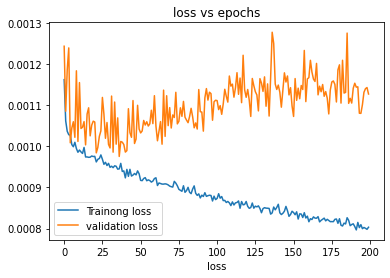

In [30]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.xlabel('Epochs')
plt.xlabel('loss')
plt.title('loss vs epochs')
plt.legend(['Trainong loss','validation loss'])

In [31]:
# Model Prediction

In [32]:
y_predict = model.predict(X_test)

Text(0.5, 1.0, 'Linear Regression Predictions')

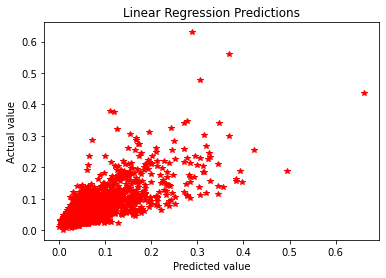

In [33]:
# Plot accuracy 
plt.plot(y_test, y_predict, '*',color= 'r')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title('Linear Regression Predictions')

In [34]:
# plot with actual scale
y_test_orig = scaler.inverse_transform(y_test)
y_predict_orig = scaler.inverse_transform(y_predict)

Text(0.5, 1.0, 'Linear Regression Predictions')

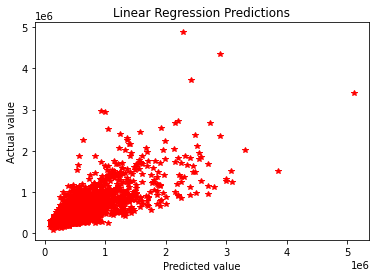

In [35]:
# Plot accuracy 
plt.plot(y_test_orig, y_predict_orig, '*',color= 'r')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title('Linear Regression Predictions')

# calculate accuracy


In [36]:
RMSE = format(np.sqrt(mean_squared_error(y_test_orig,y_predict_orig)), '0.3f')
MSE = mean_squared_error(y_test_orig,y_predict_orig)
MAE = mean_absolute_error(y_test_orig,y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)

In [37]:
print(f'RMSE: {RMSE}, MSE:{MSE}, MAE: {MAE}, \nr2_score: {r2}')

RMSE: 244523.873, MSE:59791924226.85826, MAE: 153322.66242698935, 
r2_score: 0.5409752627697222


In [38]:
# adjusted r square 
# find  number of rows(n), number of columns(k) of X-test to calculate adjusted r square 
k = X_test.shape[1]
n = len(X_test)
print(f'k : {k}, n:  {n}')
r2_adjusted = 1-(1-r2)*(n-1)/(n-k-1)
print(f'Adjusted r2 value {r2_adjusted}')

k : 7, n:  4323
Adjusted r2 value 0.5402306108205653


# Increase Model Accuracy


In [39]:
##  Select more features from data set 
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [56]:
new_selected_feature = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [57]:
X_new=  data[new_selected_feature] 
X_new.shape

(21613, 18)

In [58]:
y_new = data['price'] 

In [43]:
X_new_scaled = scaler.fit_transform(X_new)


In [44]:
y_new = y_new.values.reshape(-1,1)
y_new_scaled = scaler.fit_transform(y_new)

In [45]:
y_new.ndim

2

In [46]:
# create Train test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new_scaled,y_new_scaled,test_size = 0.20, random_state = 52)

In [47]:
print(f'X_train.shape:{X_train.shape}, X_test:{X_test.shape},y_train{y_train.shape},y_test: {y_test.shape}')

X_train.shape:(17290, 18), X_test:(4323, 18),y_train(17290, 1),y_test: (4323, 1)


In [59]:


#define model 
model = tf.keras.Sequential()
#add dense layers 
model.add(tf.keras.layers.Dense(units = 100,activation = ,input_shape= (18,)))

model.add(tf.keras.layers.Dense(units = 100))

model.add(tf.keras.layers.Dense(units = 100))

model.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))


In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               1900      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [50]:
#compile/optimize your model
model.compile(optimizer='Adam', loss = 'mean_squared_error')

In [51]:
epochs_hist = model.fit(X_train, y_train,validation_split=0.23, epochs=15, batch_size=50)

Epoch 1/15
267/267 [==============================] - 1s 2ms/step - loss: 7.4337e-04 - val_loss: 4.7090e-04
Epoch 2/15
267/267 [==============================] - 1s 2ms/step - loss: 5.3211e-04 - val_loss: 4.1018e-04
Epoch 3/15
267/267 [==============================] - 1s 2ms/step - loss: 4.3835e-04 - val_loss: 4.1698e-04
Epoch 4/15
267/267 [==============================] - 1s 2ms/step - loss: 4.0631e-04 - val_loss: 3.9604e-04
Epoch 5/15
267/267 [==============================] - 1s 2ms/step - loss: 4.2695e-04 - val_loss: 4.0818e-04
Epoch 6/15
267/267 [==============================] - 1s 2ms/step - loss: 3.5292e-04 - val_loss: 3.6544e-04
Epoch 7/15
267/267 [==============================] - 1s 2ms/step - loss: 3.3656e-04 - val_loss: 3.2451e-04
Epoch 8/15
267/267 [==============================] - 1s 2ms/step - loss: 3.1759e-04 - val_loss: 3.4162e-04
Epoch 9/15
267/267 [==============================] - 1s 2ms/step - loss: 3.0076e-04 - val_loss: 3.4605e-04
Epoch 10/15
267/267 [=======

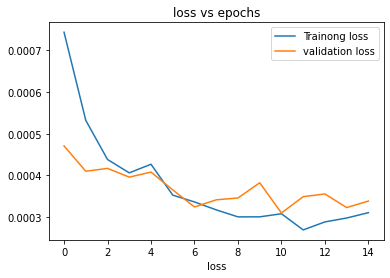

In [52]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.xlabel('Epochs')
plt.xlabel('loss')
plt.title('loss vs epochs')
plt.legend(['Trainong loss','validation loss'])

Text(0.5, 1.0, 'Linear Regression Predictions')

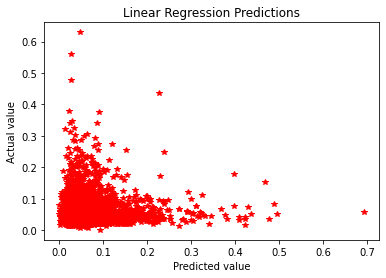

In [53]:
# Plot accuracy 
plt.plot(y_test, y_predict, '*',color= 'r')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title('Linear Regression Predictions')

In [60]:
RMSE = format(np.sqrt(mean_squared_error(y_test_orig,y_predict_orig)), '0.3f')
MSE = mean_squared_error(y_test_orig,y_predict_orig)
MAE = mean_absolute_error(y_test_orig,y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
print(RMSE, MSE, MAE, r2)

244523.873 59791924226.85826 153322.66242698935 0.5409752627697222
